In [1]:
from maelzel.core import *

In [7]:
foo = defPreset('foo', r'''
    |ibusL, ibusR|
    aout1 = vco2:a(kamp, kfreq)
    ipos = ipos >= 0 ? ipos : 0.5
    aL, aR pan2 aout1, ipos
    busmix(ibusL, aL)
    busmix(ibusR, aR)
''', output=False)
foo.dump()

In [4]:
session = playSession()



--Csound version 6.19 (double samples) Dec 20 2022
[commit: cd2cbc6494d1cefaaa357abf7c94e54e4d2e2868]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


In [4]:
busL = session.assignBus()
busR = session.assignBus()

In [5]:
session.defInstr('master', r'''
|ibusL, ibusR|
aL = busin:a(ibusL)
aR = busin:a(ibusR)
outch 1, aL, 2, aR
''')

Instr(master, ibusL:5=0, ibusR:6=0)

In [5]:
master = session.sched('master', priority=2, args={'ibusL': busL, 'ibusR': busR})

NameError: name 'busL' is not defined

In [11]:
Note(72, 2).play(instr='foo', gain=0.1, fade=0.4, args={'ibusL': busL, 'ibusR': busR})

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:foo:501.0005, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=-1 ifadein:11=0.4 ifadeout:12=0.4 ipchintrp_:13=0 ifadekind:14=1 ibusL:15=0 ibusR:16=1 ...)

In [12]:
master.stop()

OfflineRenderer(sr=44100)
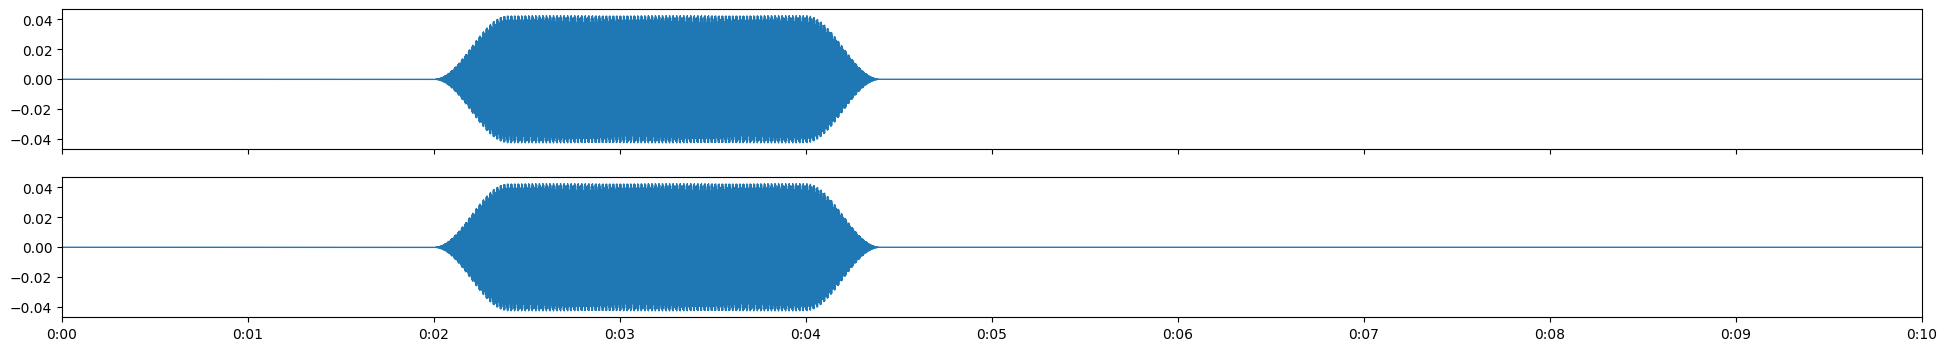

In [13]:
with render("~/tmp/render.wav") as r:
    busL, busR = r.assignBus(), r.assignBus()
    r.sched('master', priority=4, ibusL=busL, ibusR=busR, dur=10)
    Note(60, 2, offset=2).play(instr='foo', gain=0.1, fade=0.4, ibusL=busL, ibusR=busR)
r

In [16]:
r.writeCsd("~/tmp/render.csd")

'~/tmp/render.csd'